In [1]:

import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 


In [2]:
with_mask = os.listdir('data\with_mask')

without_mask = os.listdir('data\without_mask')

In [3]:
print('number of mask images:', len(with_mask))
print('number of without mask images:', len(without_mask))

number of mask images: 3725
number of without mask images: 3828


Creating Labels for the two class of images

with mask --> 1
without mask --> 0

In [4]:
# create the labels

with_mask_label = [1]*3725
without_mask_label = [0]*3828

print(with_mask_label[0:5])

print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [5]:

print(len(with_mask_label))
print(len(without_mask_label))

3725
3828


In [6]:

labels = with_mask_label + without_mask_label

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

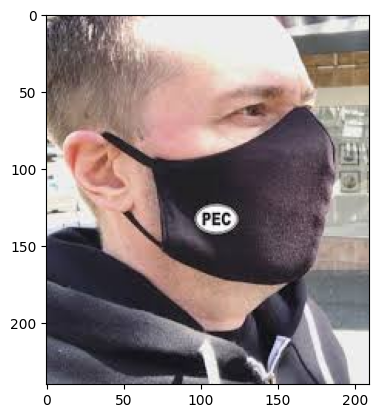

In [7]:
# displaying with mask image

img = mpimg.imread('data\with_mask\with_mask_2637.jpg')
imgplot  = plt.imshow(img)
plt.show()

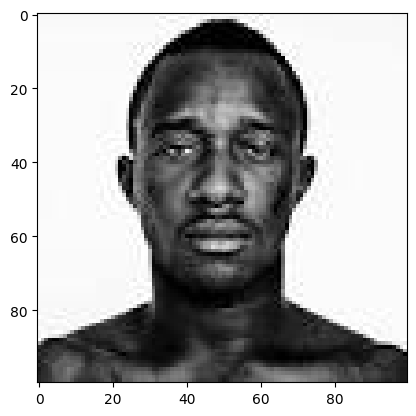

In [8]:

# displaying without mask image
img = mpimg.imread('data\without_mask\without_mask_1.jpg')
imgplot  = plt.imshow(img)
plt.show()

In [9]:
data = []
labels = []
IMG_SIZE = 100

In [10]:
# Loading images from dataset
categories = ['with_mask', 'without_mask']
for category in categories:
    path = os.path.join("data", category)
    label = categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append(resized)
            labels.append(label)
        except Exception as e:
            pass

In [11]:
# Convert to numpy
data = np.array(data) / 255.0
labels = to_categorical(labels)

In [12]:

trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.2)

In [13]:
# Model CNN --for image classification
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
history = model.fit(trainX, trainY, epochs=50, validation_data=(testX, testY))



Epoch 1/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 24s 120ms/step - accuracy: 0.8013 - loss: 0.4425 - val_accuracy: 0.9001 - val_loss: 0.2418
Epoch 2/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 35s 186ms/step - accuracy: 0.9169 - loss: 0.2189 - val_accuracy: 0.9087 - val_loss: 0.2130
Epoch 3/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 34s 178ms/step - accuracy: 0.9265 - loss: 0.1955 - val_accuracy: 0.9219 - val_loss: 0.2063
Epoch 4/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 30s 157ms/step - accuracy: 0.9571 - loss: 0.1218 - val_accuracy: 0.9193 - val_loss: 0.2054
Epoch 5/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 38s 140ms/step - accuracy: 0.9563 - loss: 0.1219 - val_accuracy: 0.9265 - val_loss: 0.1785
Epoch 6/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 30s 160ms/step - accuracy: 0.9681 - loss: 0.0839 - val_accuracy: 0.9332 - val_loss: 0.1782
Epoch 7/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 29s 155ms/step - accuracy: 0.9797 - loss: 0.0637 - val_accuracy: 0.9265 - val_loss: 0.2610
Epoch 8/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 31s 163ms/step - accuracy: 0.9872 - loss: 0

In [16]:
model.save("mask_detector.keras")


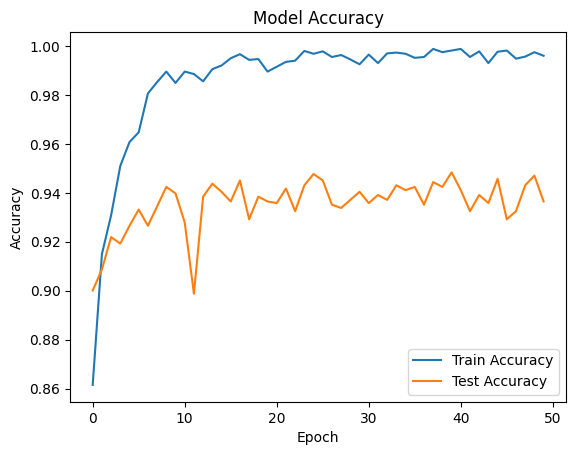

In [17]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


plt.show()

Text(0, 0.5, 'Loss')

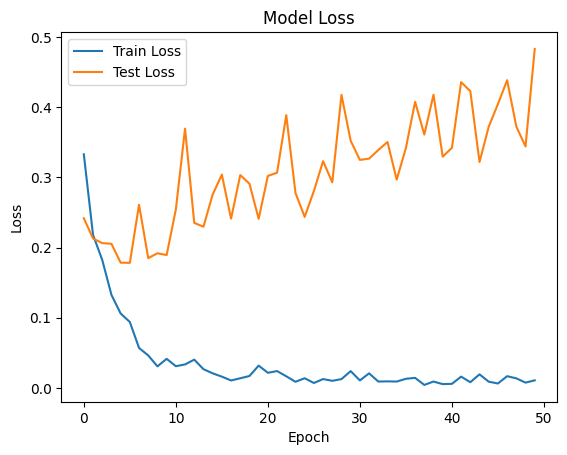

In [18]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")